机器学习
数据建模在机器学习中具有极其重要的地位。它是机器学习的核心组成部分，对于训练和评估模型、做出预测和优化决策都至关重要。

模型训练和学习：在机器学习中，模型通过从数据中学习模式和关系来进行训练。模型的性能和准确性取决于所用数据的质量和数量。良好的数据建模可以提供高质量的训练数据，有助于构建更准确和可靠的模型。

机器学习的一般框架

选择模型： 根据问题的性质，选择适当的机器学习模型。例如，对于分类问题，可以选择支持向量机、决策树、随机森林等。
划分数据集： 将数据集分为训练集和测试集，以便评估模型的性能。通常，80%的数据用于训练，20%用于测试。
训练模型： 使用训练数据集来拟合模型。
评估模型： 使用测试数据集评估模型性能。
调优模型： 根据模型性能进行调优，可能需要调整模型超参数、使用交叉验证等。
预测： 使用训练好的模型进行新数据的预测。

题目一、以鸢尾花数据集为例学习 SVM

1.加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42

2.创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）

3.使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', random_state=42) 
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro') 
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


题目二、以新闻数据分类为例 学习朴素贝叶斯

1.导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups

2.查看类别标签、数据集的描述、数据样本

3.将文本数据转换为词袋模型

4.将数据集分为训练集和测试集，训练集比例0.2，随机种子42

5.创建并训练朴素贝叶斯分类器

6.使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果

7.横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
news_data = fetch_20newsgroups(subset='all', categories=categories)

print("Categories:", news_data.target_names)
print("Description:", news_data.DESCR[:500])  
print("Sample data point:", news_data.data[0][:500])  

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(news_data.data)

X_train, X_test, y_train, y_test = train_test_split(X, news_data.target, test_size=0.8, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=news_data.target_names, yticklabels=news_data.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

题目三、以鸢尾花数据集为例 学习k-means聚类

1.导入数据集和聚类库

2.使用k-means聚类，将数据分为3个簇，设置随机种子为0

P3.CA 降维到2维空间后，输出可视化结果

4.尝试先降维，再聚类，再输出可视化结果，比较两次的不同

5.使用轮廓系数比较聚类效果

6.绘制轮廓系数与聚类数的关系图

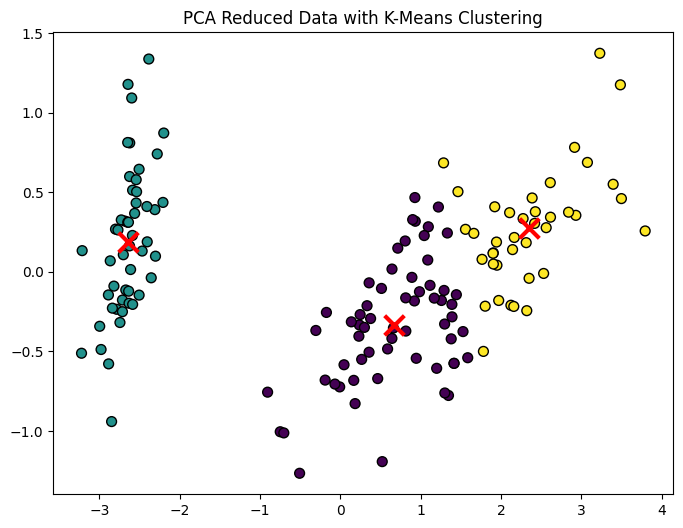

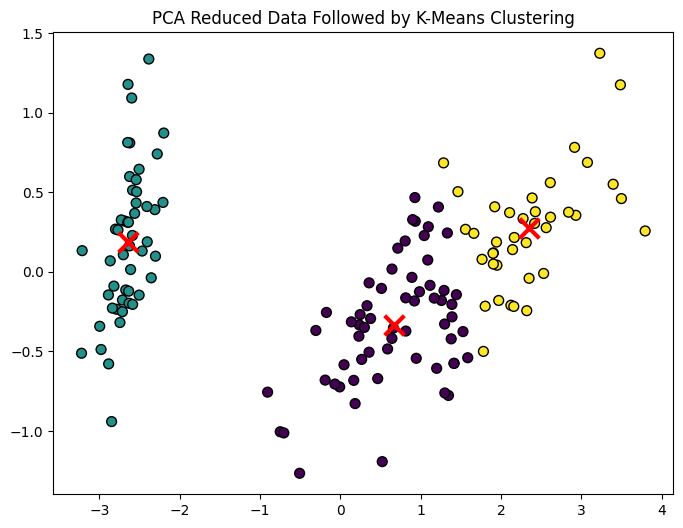

Silhouette Score (Before PCA): 0.55
Silhouette Score (After PCA): 0.60


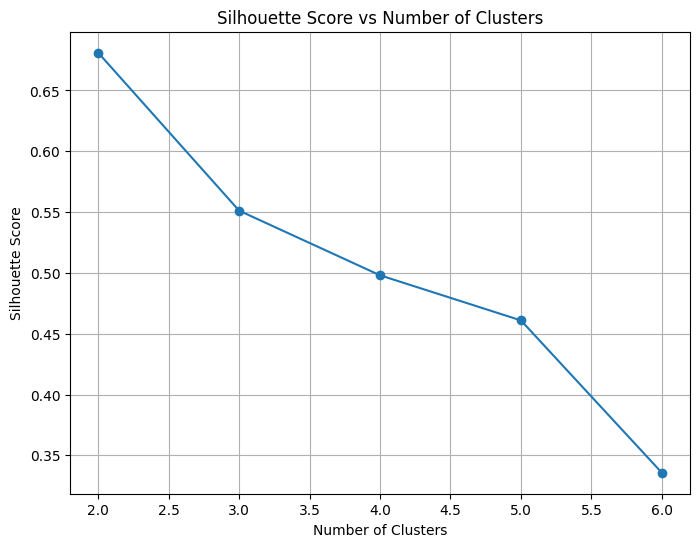

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

iris = datasets.load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', s=50, edgecolor='k')
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('PCA Reduced Data with K-Means Clustering')
plt.show()

kmeans_pca = KMeans(n_clusters=3, random_state=0)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, cmap='viridis', marker='o', s=50, edgecolor='k')
centers_pca_kmeans = kmeans_pca.cluster_centers_
plt.scatter(centers_pca_kmeans[:, 0], centers_pca_kmeans[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('PCA Reduced Data Followed by K-Means Clustering')
plt.show()

silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score (Before PCA): {silhouette_avg:.2f}')

silhouette_avg_pca = silhouette_score(X_pca, y_kmeans_pca)
print(f'Silhouette Score (After PCA): {silhouette_avg_pca:.2f}')

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()